In [44]:
"""
steps includes-

1. Data Collection / Loading
2. Data Inspection / Understanding
3. Data Cleaning
4. Data Transformation
5. Feature Engineering
6. Feature Selection
7. Data Splitting
8. Balancing / Sampling (if classification)
9. Dimensionality Reduction (optional)
10. Model developement experiments with hyperparameter tuning
11. model evaluation 
12. save model

"""

'\nsteps includes-\n\n1. Data Collection / Loading\n2. Data Inspection / Understanding\n3. Data Cleaning\n4. Data Transformation\n5. Feature Engineering\n6. Feature Selection\n7. Data Splitting\n8. Balancing / Sampling (if classification)\n9. Dimensionality Reduction (optional)\n\n'

In [45]:
import pandas as pd
import numpy as np

In [46]:
# 1. Data Collection / Loading

df=pd.read_csv(r'\\10.97.116.39\Akash\AA\AI\MLOps\covid_19_infection_detection_ci_cd_ct_pipeline_experiments\data\raw\covid_19_data.csv')
# 2. Data Inspection / Understandingdf.head()

In [47]:
# 2. Data Inspection / Understanding


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sample ID             50 non-null     int64  
 1   Age                   50 non-null     int64  
 2   Fever_C               50 non-null     float64
 3   Chronic_Lung_Disease  50 non-null     int64  
 4   Fatigue_Level         50 non-null     int64  
 5   Infected              50 non-null     int64  
dtypes: float64(1), int64(5)
memory usage: 2.5 KB


In [48]:
df.describe()

,Sample ID,Age,Fever_C,Chronic_Lung_Disease,Fatigue_Level,Infected
count,50.00000,50.000000,50.00000,50.000000,50.000000,50.000000
mean,25.50000,50.580000,37.88400,0.440000,2.920000,0.580000
std,14.57738,18.858322,1.02606,0.501427,1.411903,0.498569
min,1.00000,19.000000,36.50000,0.000000,1.000000,0.000000
25%,13.25000,35.250000,37.00000,0.000000,2.000000,0.000000
50%,25.50000,50.500000,37.65000,0.000000,3.000000,1.000000
75%,37.75000,65.750000,38.70000,1.000000,4.000000,1.000000
max,50.00000,85.000000,39.90000,1.000000,5.000000,1.000000


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Administrator\AppData\Local\Temp\ipykernel_23444\3965537360.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

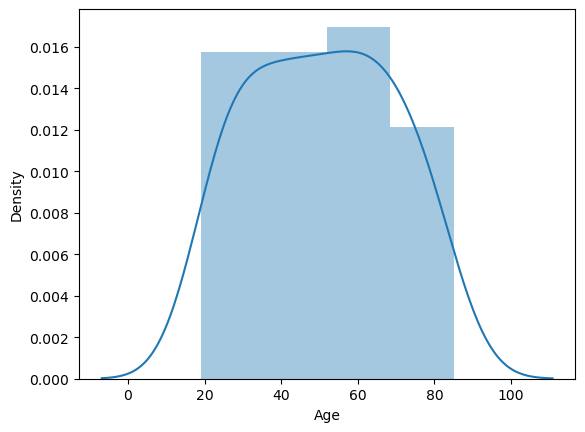

In [50]:
# features distribution 

sns.distplot(df['Age'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_23444\1378063277.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fever_C'])


<Axes: xlabel='Fever_C', ylabel='Density'>

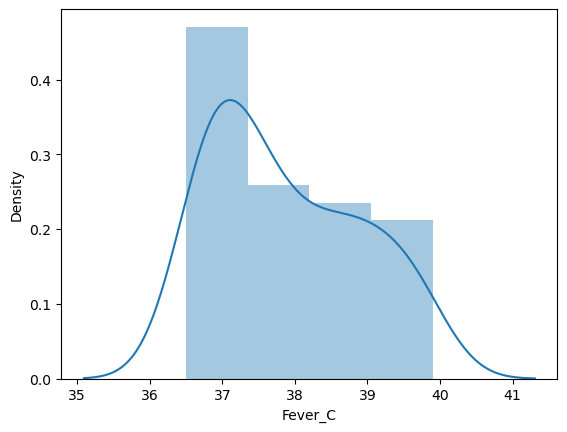

In [51]:
sns.distplot(df['Fever_C'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_23444\1660422507.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Chronic_Lung_Disease'])


<Axes: xlabel='Chronic_Lung_Disease', ylabel='Density'>

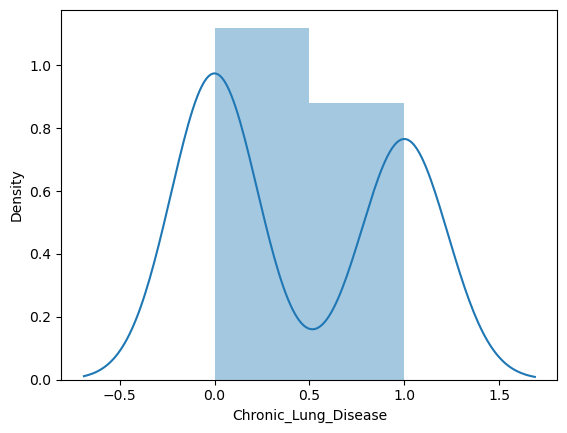

In [52]:
sns.distplot(df['Chronic_Lung_Disease'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_23444\779891321.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fatigue_Level'])


<Axes: xlabel='Fatigue_Level', ylabel='Density'>

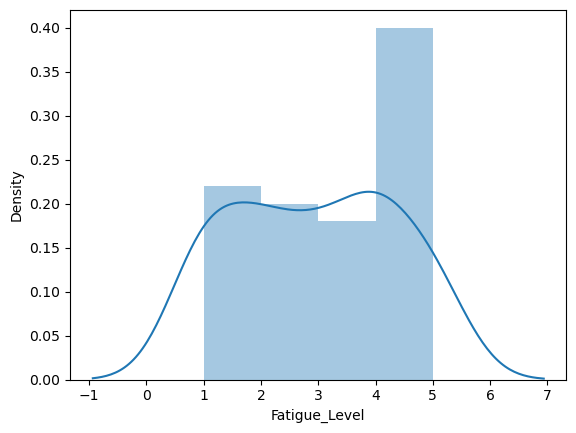

In [53]:
sns.distplot(df['Fatigue_Level'])

In [54]:
# we can transform distribution using logs transformation etc. to make data distribution normal distribution

In [55]:
df.shape

(50, 6)

In [56]:
# 3. Data Cleaning

#i) null values 
df.drop('Sample ID',axis=1,inplace=True)
df.head()

,Age,Fever_C,Chronic_Lung_Disease,Fatigue_Level,Infected
0,68,38.5,1,4,1
1,25,36.6,0,1,0
2,42,37.1,0,2,0
3,75,39.2,1,5,1
4,33,38.0,0,3,1


In [57]:
# check and handle null values
df.isnull().sum()

Age                     0
Fever_C                 0
Chronic_Lung_Disease    0
Fatigue_Level           0
Infected                0
dtype: int64

In [58]:
"""
null values can be handle by using belo methods

1. remove rows and columns based percentage and importance
2. use mean , mode and median methods to fill missing values based on data distribution
3. use ML models to fill missing values like KNN algorithm etc.

"""

'\nnull values can be handle by using belo methods\n\n1. remove rows and columns based percentage and importance\n2. use mean , mode and median methods to fill missing values based on data distribution\n3. use ML models to fill missing values like KNN algorithm etc.\n\n'

In [59]:
# ii) outliers detection and handling 

"""
A. Statistical (Classical) Methods

These rely on mathematical assumptions and distributions.

1) Z-Score / Standard Deviation Method

Points with |z| > 3 often considered outliers.

Works well for normally distributed data.

2) IQR (Interquartile Range) Method

Compute Q1 & Q3, then IQR = Q3 - Q1

Outliers lie below Q1 − 1.5×IQR or above Q3 + 1.5×IQR

Good for skewed datasets.


B. Visualization-Based Methods

Useful for exploratory analysis.

1. Box Plot

2. Histogram

3. Scatter Plot

4. QQ-Plot

5. Violin Plot



C. Machine Learning & Distance-Based Methods

1. K-Nearest Neighbors (KNN Distance Score)

Sample far from neighbors is an outlier

2. Isolation Forest

Randomly isolates points; fewer splits = more anomalous

3. Local Outlier Factor (LOF)

Measures local density deviation from neighbors

4. DBSCAN

Clustering; points not assigned to clusters considered noise

5. One-Class SVM

Learns a boundary around normal data

6. Autoencoders (Deep Learning)

High reconstruction error → outlier

Good for high-dimensional data


# 📌 How to Handle Outliers


Method	                            When to Use
Remove	                            When errors or impossible values exist
Cap or Floor (Winsorization)	    For extreme but valid values
Transform (Log, Box-Cox)	        When distribution is skewed
Impute (Mean/Median)	            When missing after removal
Separate modeling	                For fraud, anomalies, industrial monitoring
Use robust models	                Trees, GBMs, Random Forests handle outliers better






"""



'\nA. Statistical (Classical) Methods\n\nThese rely on mathematical assumptions and distributions.\n\n1) Z-Score / Standard Deviation Method\n\nPoints with |z| > 3 often considered outliers.\n\nWorks well for normally distributed data.\n\n2) IQR (Interquartile Range) Method\n\nCompute Q1 & Q3, then IQR = Q3 - Q1\n\nOutliers lie below Q1 − 1.5×IQR or above Q3 + 1.5×IQR\n\nGood for skewed datasets.\n\n\nB. Visualization-Based Methods\n\nUseful for exploratory analysis.\n\n1. Box Plot\n\n2. Histogram\n\n3. Scatter Plot\n\n4. QQ-Plot\n\n5. Violin Plot\n\n\n\nC. Machine Learning & Distance-Based Methods\n\n1. K-Nearest Neighbors (KNN Distance Score)\n\nSample far from neighbors is an outlier\n\n2. Isolation Forest\n\nRandomly isolates points; fewer splits = more anomalous\n\n3. Local Outlier Factor (LOF)\n\nMeasures local density deviation from neighbors\n\n4. DBSCAN\n\nClustering; points not assigned to clusters considered noise\n\n5. One-Class SVM\n\nLearns a boundary around normal data\n

In [60]:
# iii) categorical features handling 

"""
1. Label Encoding 
2. one-hot encoding
3. word2vec
4. TFIDF
5. 
"""

'\n1. Label Encoding \n2. one-hot encoding\n3. word2vec\n4. TFIDF\n5. \n'

In [61]:
# 4. Data Transformation


"""
--> data scalling and noarmalization methods

1. minMax Scaling

X′=X−Xmin/Xmax−Xmin

2. Standardization Methods


X′=X−μ/σ

"""

'\n--> data scalling and noarmalization methods\n\n1. minMax Scaling\n\nX′=X−Xmin/Xmax−Xmin\n\n2. Standardization Methods\n\n\nX′=X−μ/σ\n\n'

In [62]:
# 5. Feature Engineering & Feature Selection
"""
--> check relation between feature and target 
--> use heatmap to check the feature importance
--> use model to feature importance
--> create new features using existing features
--> use L1 Lasso and L2 Ridge Regularization methods for feature selection

"""

'\n--> check relation between feature and target \n--> use heatmap to check the feature importance\n--> use model to feature importance\n--> create new features using existing features\n--> use L1 Lasso and L2 Ridge Regularization methods for feature selection\n\n'

In [63]:
X = df.drop('Infected', axis=1)
y = df['Infected']


In [68]:
# 7. Balancing / Sampling (if classification)

"""
1️  Oversampling
2. Undersampling
3. Class Weighting (Cost-Sensitive Learning)


how o check imbalance :
df['target'].value_counts(normalize=True)



"""


df['Infected'].value_counts(normalize=True)


Infected
1    0.58
0    0.42
Name: proportion, dtype: float64

In [65]:
# 8. Dimensionality Reduction (optional)

"""
1. PCA (use eigen vector and eigen values 
"""

In [69]:
# 10. Model developement , model training


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)



In [ ]:
# 10.1 detect model overfitting and underfitting and handle overfitting and underfitting


In [71]:
from sklearn.ensemble import RandomForestClassifier


model=RandomForestClassifier()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

In [73]:

# 11. model evalaution

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
[[4 0]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [74]:
import pickle

# Suppose your trained model is named 'model'
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
